# 10.1 Embedding

In [ ]:
# 단어 및 문장 간 관련성 계산
# 의미적 혹은 문법적 정보의 함축

## 10.1.1 Sparse Representation based Embedding

In [2]:
import pandas as pd
class2 = pd.read_csv('data/chap10/class2.csv')

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

train_x = label_encoder.fit_transform(class2['class2'])
train_x

array([2, 2, 1, 0, 1, 0])

In [ ]:
""" One-hot Encoding의 단점 

1. 단어끼리의 관계성(유의어, 반의어) 업이 서로 독립적인 관계
2. 차원이 너무 커지는 문제가 발생

"""

## 10.1.2 Counting based Embedding

In [3]:
# Corpus에 counter vector 적용

from sklearn.feature_extraction.text import CountVectorizer
corpus = [
          'This is last chance.',
          'and if you do not have this chance.',
          'you will never get any chance.',
          'will you do get this one?',
          'please, get this chance',
]

vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'this': 13,
 'is': 7,
 'last': 8,
 'chance': 2,
 'and': 0,
 'if': 6,
 'you': 15,
 'do': 3,
 'not': 10,
 'have': 5,
 'will': 14,
 'never': 9,
 'get': 4,
 'any': 1,
 'one': 11,
 'please': 12}

In [4]:
vect.transform(['you will never get any chance.']).toarray()

array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]])

In [5]:
vect = CountVectorizer(stop_words=["and", "is", "please", "this"]).fit(corpus)
vect.vocabulary_

{'last': 6,
 'chance': 1,
 'if': 5,
 'you': 11,
 'do': 2,
 'not': 8,
 'have': 4,
 'will': 10,
 'never': 7,
 'get': 3,
 'any': 0,
 'one': 9}

In [ ]:
# TF-IDF : Term Frequency-Inverse Document Frequency

# TF : 특정 문서 d에서 특정 단어 t의 등장 횟수
# DF : 특정 단어 t가가 포함된 문서 개수
# IDF : Inverse Document Frequency

# 키워드 검색을 기반으로 하는 검색 엔진
# 중요 키워드 분석
# 검색 엔진에서 검색 결과의 순위를 결정 

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc = ['I like machine learning', 'I love deep learning', 'I run everyday']
tfidf_vectorizer = TfidfVectorizer(min_df=1)
tfidf_matrix = tfidf_vectorizer.fit_transform(doc)
doc_distance = (tfidf_matrix * tfidf_matrix.T)
print('유사도를 위한', str(doc_distance.get_shape()[0]), 'x', str(doc_distance.get_shape()[1]), '행렬을 만들었습니다.')
print(doc_distance.toarray())

유사도를 위한 3 x 3 행렬을 만들었습니다.
[[1.       0.224325 0.      ]
 [0.224325 1.       0.      ]
 [0.       0.       1.      ]]


## 10.1.3 Prediction based Embedding

### Word2Vec

In [ ]:
import nltk
nltk.download('punkt')

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings(action='ignore')
import gensim
from gensim.models import Word2Vec

sample = open('/content/peter.txt', "r", encoding='UTF8')
s = sample.read()

f = s.replace('\n', ' ')
data = []

for i in sent_tokenize(f):
  temp = []
  for j in word_tokenize(i):
    temp.append(j.lower())
  data.append(temp)

data[0]

['once',
 'upon',
 'a',
 'time',
 'in',
 'london',
 ',',
 'the',
 'darlings',
 'went',
 'out',
 'to',
 'a',
 'dinner',
 'party',
 'leaving',
 'their',
 'three',
 'children',
 'wendy',
 ',',
 'jhon',
 ',',
 'and',
 'michael',
 'at',
 'home',
 '.']

In [8]:
model1 = gensim.models.Word2Vec(data, min_count=1, size=100, window=5, sg=0)
print("Cosine similarity between 'peter' " + "'wendy' - CBOW : ", model1.similarity('peter', 'wendy'))

Cosine similarity between 'peter' 'wendy' - CBOW :  -0.059717968


In [9]:
print("Cosine similarity between 'peter' " + "'hook' - CBOW : ", model1.similarity('peter', 'hook'))

Cosine similarity between 'peter' 'hook' - CBOW :  0.17057094


In [10]:
model2 = gensim.models.Word2Vec(data, min_count=1, size=100, window=5, sg=1)
print("Cosine similarity between 'peter' " + "'wendy' - Skip Gram : ", model2.similarity('peter', 'wendy'))

Cosine similarity between 'peter' 'wendy' - Skip Gram :  0.23208164


In [11]:
print("Cosine similarity between 'peter' " + "'hook' - Skip Gram : ", model2.similarity('peter', 'hook'))

Cosine similarity between 'peter' 'hook' - Skip Gram :  0.5484486


In [12]:
from gensim.test.utils import common_texts
from gensim.models import FastText

model = FastText(data, size=4, window=3, min_count=1, iter=10)

In [13]:
sim_score = model.wv.similarity('peter', 'wendy')
print(sim_score)

0.6989395


In [14]:
sim_score = model.wv.similarity('peter', 'hook')
print(sim_score)

-0.23571663


In [13]:
from __future__ import print_function
from gensim.models import KeyedVectors

model_kr = KeyedVectors.load_word2vec_format('data/chap10/wiki.ko.vec')

In [14]:
find_similar_to = '노력'

for similar_word in model_kr.similar_by_word(find_similar_to):
  print("Word: {0}, Similarity: {1:.2f}".format(
      similar_word[0], similar_word[1]
  ))

Word: 노력함, Similarity: 0.80
Word: 노력중, Similarity: 0.75
Word: 노력만, Similarity: 0.72
Word: 노력과, Similarity: 0.71
Word: 노력의, Similarity: 0.69
Word: 노력가, Similarity: 0.69
Word: 노력이나, Similarity: 0.69
Word: 노력없이, Similarity: 0.68
Word: 노력맨, Similarity: 0.68
Word: 노력보다는, Similarity: 0.68


In [ ]:
similarities = model_kr.wv.most_similar(positive=['동물', '육식동물'], negative=['사람'])
print(similarities)

## 10.1.4 Counting/Prediction based Embedding

In [ ]:
# GloVe: Global Vectors for Word Representation

# LSA : Latent Semantic Analysis
# Word2Vec
# 두 Models의 단점을 보완

In [19]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = datapath('/Users/mini/TensorFlow/data/chap10/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("/Users/mini/TensorFlow/data/chap10/glove.6B.100d.txt")
glove2word2vec(glove_file, word2vec_glove_file)

/var/folders/lt/7j3txvvn1bgc84pp3c9kldcw0000gn/T/ipykernel_3343/2418356103.py:12: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_glove_file)


(400000, 100)

In [20]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)
model.most_similar('bill')

[('legislation', 0.8072139620780945),
 ('proposal', 0.7306863069534302),
 ('senate', 0.7142540812492371),
 ('bills', 0.704440176486969),
 ('measure', 0.6958035230636597),
 ('passed', 0.6906244158744812),
 ('amendment', 0.6846879720687866),
 ('provision', 0.6845566630363464),
 ('plan', 0.6816462874412537),
 ('clinton', 0.6663140058517456)]

In [21]:
model.most_similar('cherry')

[('peach', 0.688809871673584),
 ('mango', 0.6838189959526062),
 ('plum', 0.6684104204177856),
 ('berry', 0.659035861492157),
 ('grove', 0.6581552028656006),
 ('blossom', 0.6503506302833557),
 ('raspberry', 0.6477391123771667),
 ('strawberry', 0.6442098021507263),
 ('pine', 0.6390928626060486),
 ('almond', 0.6379212141036987)]

In [22]:
model.most_similar(negative=['cherry'])

[('kazushige', 0.4834350347518921),
 ('askerov', 0.4778185784816742),
 ('lakpa', 0.46915262937545776),
 ('ex-gay', 0.45713332295417786),
 ('tadayoshi', 0.4522107243537903),
 ('turani', 0.44810065627098083),
 ('saglam', 0.4469599425792694),
 ('aijun', 0.4435270130634308),
 ('adjustors', 0.44235295057296753),
 ('nyum', 0.4423117935657501)]

In [23]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [24]:
def analogy(x1, x2, y1):
  result = model.most_similar(positive=[y1, x2], negative=[x1])
  return result[0][0]

analogy('australia', 'beer', 'france')

'champagne'

In [25]:
analogy('tall', 'tallest', 'long')

'longest'

In [26]:
print(model.doesnt_match('breakfast cereal dinner lunch'.split()))

cereal


# 10.2 Transformer Attention

## 10.2.1 seq2seq

In [26]:
# 라이브러리 호출

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import os
import io
import re
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split

In [4]:
# 데이터셋 전처리 함수 정의

import unicodedata

def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

def preprocess_sentence(w):
    w = unicode_to_ascii(w.lower().strip())
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)
    w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)
    w = w.rstrip().strip()
    w = '<start> ' + w + ' <end>'
    return w

In [5]:
# 데이터 전처리 확인

en_sentence = u"May I borrow this book?"
sp_sentence = u" ¿ Puedo tomar prestado este libro?"
print(preprocess_sentence(en_sentence))
print(preprocess_sentence(sp_sentence).encode('utf-8'))

<start> may i borrow this book ? <end>
b'<start> \xc2\xbf puedo tomar prestado este libro ? <end>'


In [6]:
# [ENGLISH, SPANISH] 형식의 단어 변환

def create_dataset(path, num_examples):
    lines = io.open(path, encoding='UTF-8').read().strip().split('\n')

    word_pairs = [[preprocess_sentence(w) for w in l.split('\t')] for l in lines[:num_examples]]

    return zip(*word_pairs)


def max_length(tensor):
    return max(len(t) for t in tensor)

def tokenize(lang):
    lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    lang_tokenizer.fit_on_texts(lang)
    tensor = lang_tokenizer.texts_to_sequences(lang)
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, lang_tokenizer

def load_dataset(path, num_examples=None):
    targ_lang, inp_lang = create_dataset(path, num_examples)

    input_tensor, inp_lang_tokenizer = tokenize(inp_lang)
    target_tensor, targ_lang_tokenizer = tokenize(targ_lang)

    return input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer

In [7]:
# 데이터셋 크기 조정

num_examples = 30000
input_tensor, target_tensor, inp_lang, targ_lang = load_dataset('data/chap10/spa.txt', num_examples)

max_length_targ, max_length_inp = max_length(target_tensor), max_length(input_tensor)

input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

In [8]:
# 하이퍼 파라미터 초기환

BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64

steps_per_epoch = len(input_tensor_train) // BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = len(inp_lang.word_index) + 1
vocab_tar_size = len(targ_lang.word_index) + 1

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-05-19 10:49:49.928911: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-19 10:49:49.929259: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
# 인코더 네트워크 구축

class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.enc_units, return_sequences=True, return_state=True, recurrent_initializer='glorot_uniform')

    def call(self, x, hidden):
        x = self.embedding(x)
        output, state = self.gru(x, initial_state=hidden)
        return output, state
    
    def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.enc_units))

encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

In [10]:
# 어텐션 구축

class EDAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(EDAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)
    
    def call(self, query, values):
        hidden_with_time_axis = tf.expand_dims(query, 1)
        score = self.V(tf.nn.tanh(self.W1(values) + self.W2(hidden_with_time_axis)))
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

attention_layer = EDAttention(10)

In [18]:
# 디코더 네트워크 구축

class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.dec_units, return_sequences=True, return_state=True, recurrent_initializer='glorot_uniform')
        self.fc = tf.keras.layers.Dense(vocab_size)
        self.attention = EDAttention(self.dec_units)
    
    def call(self, x, hidden, enc_output):
        context_vector, attention_weights = self.attention(hidden, enc_output)
        x = self.embedding(x)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
        output, state = self.gru(x)
        output = tf.reshape(output, (-1, output.shape[2]))
        x = self.fc(output)
        return x, state, attention_weights
    
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

In [19]:
# 옵티마이저 및 손실 함수 정의

optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    return tf.reduce_mean(loss_)

In [20]:
# 체크포인트 설정

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer, encoder=encoder, decoder=decoder)

In [21]:
# 모델 훈련 함수 정의

def train_step(inp, targ, enc_hidden):
    loss = 0

    with tf.GradientTape() as tape:
        enc_output, enc_hidden = encoder(inp, enc_hidden)
        dec_hidden = enc_hidden
        dec_input = tf.expand_dims([targ_lang.word_index['<start>']] * BATCH_SIZE, 1)
        for t in range(1, targ.shape[1]):
            predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)
            loss += loss_function(targ[:, t], predictions)
            dec_input = tf.expand_dims(targ[:, t], 1)
        
    batch_loss = (loss / int(targ.shape[1]))
    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    return batch_loss

In [22]:
EPOCHS = 10

for epoch in range(EPOCHS):
    start = time.time()

    enc_hidden = encoder.initialize_hidden_state()
    total_loss = 0

    for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
        batch_loss = train_step(inp, targ, enc_hidden)
        total_loss += batch_loss

        if batch % 100 == 0:
            print('Epoch {} Batch {} Loss {:.4f}'.format(epoch+1, batch, batch_loss.numpy()))
    
    if (epoch+1) % 2 == 0:
        checkpoint.save(file_prefix=checkpoint_prefix)
    
    print('Epoch {} Loss {:.4f}'.format(epoch+1, total_loss/steps_per_epoch))

print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 4.6265
Epoch 1 Batch 100 Loss 2.1590
Epoch 1 Batch 200 Loss 1.9477
Epoch 1 Batch 300 Loss 1.8691
Epoch 1 Loss 2.0479
Epoch 2 Batch 0 Loss 1.5924
Epoch 2 Batch 100 Loss 1.5670
Epoch 2 Batch 200 Loss 1.4960
Epoch 2 Batch 300 Loss 1.3117
Epoch 2 Loss 1.4602
Epoch 3 Batch 0 Loss 1.2277
Epoch 3 Batch 100 Loss 1.2599
Epoch 3 Batch 200 Loss 1.0851
Epoch 3 Batch 300 Loss 1.0105
Epoch 3 Loss 1.1030
Epoch 4 Batch 0 Loss 0.7619
Epoch 4 Batch 100 Loss 0.8217
Epoch 4 Batch 200 Loss 0.8738
Epoch 4 Batch 300 Loss 0.7423
Epoch 4 Loss 0.8219
Epoch 5 Batch 0 Loss 0.6497
Epoch 5 Batch 100 Loss 0.6700
Epoch 5 Batch 200 Loss 0.4766
Epoch 5 Batch 300 Loss 0.7064
Epoch 5 Loss 0.6170
Epoch 6 Batch 0 Loss 0.3987
Epoch 6 Batch 100 Loss 0.4068
Epoch 6 Batch 200 Loss 0.5498
Epoch 6 Batch 300 Loss 0.4898
Epoch 6 Loss 0.4590
Epoch 7 Batch 0 Loss 0.3269
Epoch 7 Batch 100 Loss 0.3124
Epoch 7 Batch 200 Loss 0.3395
Epoch 7 Batch 300 Loss 0.3778
Epoch 7 Loss 0.3392
Epoch 8 Batch 0 Loss 0.2104
Epoch 

In [23]:
# 모델 평가 및 시각화를 위한 함수

def evaluate(sentence):
    attention_plot = np.zeros((max_length_targ, max_length_inp))

    sentence = preprocess_sentence(sentence)

    inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]
    inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs], maxlen=max_length_inp, padding='post')
    inputs = tf.convert_to_tensor(inputs)
    result = ''
    hidden = [tf.zeros((1, units))]
    enc_out, enc_hidden = encoder(inputs, hidden)
    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)

    for t in range(max_length_targ):
        predictions, dec_hidden, attention_weights = decoder(dec_input, dec_hidden, enc_out)
        attention_weights = tf.reshape(attention_weights, (-1,))
        attention_plot[t] = attention_weights.numpy()
        predicted_id = tf.argmax(predictions[0]).numpy()
        result += targ_lang.index_word[predicted_id] + ' '
        if targ_lang.index_word[predicted_id] == '<end>':
            return result, sentence, attention_plot
        
        dec_input = tf.expand_dims([predicted_id], 0)
    
    return result, sentence, attention_plot

In [24]:
# 어텐션 가중치 시각화 함수

def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

Input: <start> esta es mi vida . <end>
Predicted translation: this is my life . <end> 


/var/folders/lt/7j3txvvn1bgc84pp3c9kldcw0000gn/T/ipykernel_17597/1061925670.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
/var/folders/lt/7j3txvvn1bgc84pp3c9kldcw0000gn/T/ipykernel_17597/1061925670.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)


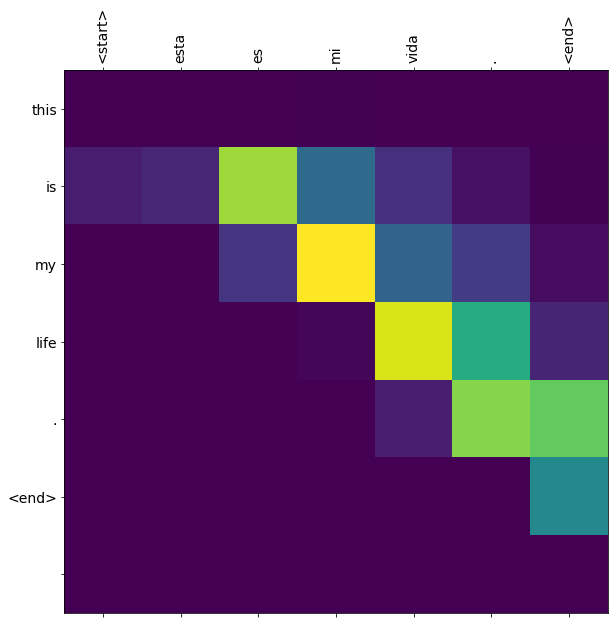

In [27]:
# 번역을 위한 함수 정의 및 번역 문장 입력 함수

def translate(sentence):
    result, sentence, attention_plot = evaluate(sentence)

    print('Input: %s' % sentence)
    print('Predicted translation: {}'.format(result))

    attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
    plot_attention(attention_plot, sentence.split(' '), result.split(' '))

checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

translate(u'esta es mi vida.')

## 10.2.2 BERT

In [ ]:
!pip install bert-for-tf2
!pip install sentencepiece

In [32]:
# 라이브러리 호출 및 데이터셋 준비

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import bert
import pandas as pd

movie_reviews = pd.read_csv('data/chap10/IMDB Dataset.csv')
movie_reviews.isnull().values.any()
movie_reviews.shape

(50000, 2)

In [35]:
# 데이터셋 전처리

def preprocess_text(sen):
    sentence = remove_tags(sen)
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    sentence = re.sub(r"\s+[a-zA-Z]\s", ' ', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence

TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('', text)

reviews = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    reviews.append(preprocess_text(sen))

print(movie_reviews.columns.values)

['review' 'sentiment']


In [36]:
# sentiment 열에 대한 고유값 확인

movie_reviews.sentiment.unique()

array(['positive', 'negative'], dtype=object)

In [37]:
# 긍정/부정 감정 변환

y = movie_reviews['sentiment']
y = np.array(list(map(lambda x: 1 if x =='positive' else 0, y)))

In [39]:
# 리뷰 출력

print(reviews[10])

Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines At first it was very odd and pretty funny but as the movie progressed didn find the jokes or oddness funny anymore Its low budget film thats never problem in itself there were some pretty interesting characters but eventually just lost interest imagine this film would appeal to stoner who is currently partaking For something similar but better try Brother from another planet 


In [40]:
# 긍정/부정 리뷰 확인

print(y[10])

0


In [44]:
# 텍스트의 토큰화

BertTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=False)
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocabulary_file, to_lower_case)

In [45]:
# 임의의 문장 토큰화

tokenizer.tokenize("don't be so judgmental")

['don', "'", 't', 'be', 'so', 'judgment', '##al']

In [46]:
# 토큰의 ID 변환

tokenizer.convert_tokens_to_ids(tokenizer.tokenize("don't be so judgmental"))

[2123, 1005, 1056, 2022, 2061, 8689, 2389]

In [47]:
# 리뷰 텍스트 데이터 토큰화

def tokenize_reviews(text_reviews):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text_reviews))

tokenized_reviews = [tokenize_reviews(review) for review in reviews]

In [48]:
# 문장 길이 통일

import random

reviews_with_len = [[review, y[i], len(review)] for i, review in enumerate(tokenized_reviews)]
random.shuffle(reviews_with_len)
reviews_with_len.sort(key=lambda x: x[2])
sorted_reviews_labels = [(review_lab[0], review_lab[1]) for review_lab in reviews_with_len]
processed_dataset = tf.data.Dataset.from_generator(lambda: sorted_reviews_labels, output_types=(tf.int32, tf.int32))
BATCH_SIZE = 32
batched_dataset = processed_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))

next(iter(batched_dataset))

2022-05-19 12:17:08.458127: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


(<tf.Tensor: shape=(32, 21), dtype=int32, numpy=
 array([[ 2054,  5896,  2054,  2466,  2054,  6752,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0],
        [ 3191,  1996,  2338,  5293,  1996,  3185,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0],
        [ 3078,  5436,  3078,  3257,  3532,  7613,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0],
        [ 2062, 23873,  3993,  2062, 11259,  2172,  2172,  2062, 14888,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0],
        [ 2023,  3185,  2003,  6659,  2021,  2009,  2038,  2070,  2204,
          3896,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0],
        [ 1045,  2876,  9278,  2023,  2028,  2130,  2006,  7922, 12635,
    

In [49]:
# 데이터셋을 훈련과 검증 세트로 분리

import math

TOTAL_BATCHES = math.ceil(len(sorted_reviews_labels) / BATCH_SIZE)
TEST_BATCHES = TOTAL_BATCHES // 10
batched_dataset.shuffle(TOTAL_BATCHES)
test_data = batched_dataset.take(TEST_BATCHES)
train_data = batched_dataset.skip(TEST_BATCHES)

In [70]:
# 네트워크 생성

class TEXT_MODEL(tf.keras.Model):
    def __init__(self,
                 vocabulary_size,
                 embedding_dimensions=128,
                 cnn_filters=50,
                 dnn_units=512,
                 model_output_classes=2,
                 dropout_rate=0.1,
                 training=False,
                 name="text_model"):
        super(TEXT_MODEL, self).__init__(name=name)
    
        self.embedding = tf.keras.layers.Embedding(vocabulary_size, 
                                                   embedding_dimensions)
        self.cnn_layer1 = tf.keras.layers.Conv1D(filters=cnn_filters,
                                                 kernel_size=2,
                                                 padding='valid',
                                                 activation='relu')
        self.cnn_layer2 = tf.keras.layers.Conv1D(filters=cnn_filters,
                                                 kernel_size=3,
                                                 padding='valid',
                                                 activation='relu')
        self.cnn_layer3 = tf.keras.layers.Conv1D(filters=cnn_filters,
                                                 kernel_size=4,
                                                 padding='valid',
                                                 activation='relu')
        self.pool = tf.keras.layers.GlobalMaxPool1D()
        self.dense_1 = tf.keras.layers.Dense(units=dnn_units, activation='relu')
        self.dropout = tf.keras.layers.Dropout(rate=dropout_rate)
        if model_output_classes == 2:
            self.last_dense = tf.keras.layers.Dense(units=1, activation='sigmoid')
        else:
            self.last_dense = tf.keras.layers.Dense(units=model_output_classes, activation='softmax')
        
    def call(self, inputs, training):
        l = self.embedding(inputs)
        l_1 = self.cnn_layer1(l)
        l_1 = self.pool(l_1)
        l_2 = self.cnn_layer2(l)
        l_2 = self.pool(l_2)
        l_3 = self.cnn_layer3(l)
        l_3 = self.pool(l_3)

        concatenated = tf.concat([l_1, l_2, l_3], axis=-1)
        concatenated = self.dense_1(concatenated)
        concatenated = self.dropout(concatenated, training)
        model_output = self.last_dense(concatenated)
        return model_output


In [71]:
# 하이퍼파라미터 초기화

VOCAB_LENGTH = len(tokenizer.vocab)
EMB_DIM = 200
CNN_FILTERS = 100
DNN_UNITS = 256
OUTPUT_CLASSES = 2
DROPOUT_RATE = 0.2
NB_EPOCHS = 5


In [72]:
# 하이퍼파라미터 값을 네트워크에 전달

text_model = TEXT_MODEL(vocabulary_size=VOCAB_LENGTH,
                        embedding_dimensions=EMB_DIM,
                        cnn_filters=CNN_FILTERS,
                        dnn_units=DNN_UNITS,
                        model_output_classes=OUTPUT_CLASSES,
                        dropout_rate=DROPOUT_RATE)

In [73]:
# 모델 훈련

if OUTPUT_CLASSES == 2:
    text_model.compile(loss="binary_crossentropy",
                       optimizer="adam",
                       metrics=["accuracy"])

else:
    text_model.compile(loss="sparse_categorical_crossentropy",
                       optimizer="adam",
                       metrics=["accuracy"])

text_model.fit(train_data, epochs=NB_EPOCHS)

Epoch 1/5


2022-05-19 12:45:35.147588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - 101s 70ms/step - loss: 0.3020 - accuracy: 0.8651
Epoch 2/5
1407/1407 [==============================] - 114s 81ms/step - loss: 0.1302 - accuracy: 0.9512
Epoch 3/5
1407/1407 [==============================] - 113s 80ms/step - loss: 0.0645 - accuracy: 0.9764
Epoch 4/5
1407/1407 [==============================] - 117s 83ms/step - loss: 0.0337 - accuracy: 0.9880
Epoch 5/5
1407/1407 [==============================] - 118s 84ms/step - loss: 0.0209 - accuracy: 0.9926


In [74]:
# 모델 성능 평가

results = text_model.evaluate(test_data)
print(results)

2022-05-19 12:54:57.796306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


156/156 [==============================] - 5s 32ms/step - loss: 0.5165 - accuracy: 0.8918
[0.516525149345398, 0.8918269276618958]


In [75]:
# 라이브러리 호출

import pandas as pd
import bert
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [76]:
# 데이터셋 메모리로 로딩

train_data = pd.read_csv('data/chap10/train.csv')
test_data = pd.read_csv('data/chap10/test.csv')

In [77]:
# 텍스트 토큰화

url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/2'
bert_layer = hub.KerasLayer(url, trainable=True)

FullTokenizer = bert.bert_tokenization.FullTokenizer

vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocab_file, do_lower_case)

In [78]:
# 텍스트 전처리

def bert_encoder(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []

    for text in texts:
        text = tokenizer.tokenize(text)
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

train_input = bert_encoder(train_data, tokenizer, max_len=160)
train_labels = train_data.target.values

In [79]:
# 모델 생성

def build_model(max_len=512):
    input_word_ids = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name='positional_ids')
    input_segment_ids = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name='segment_ids')
    input_mask = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name='input_mask')
    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_segment_ids])
    clf_output = sequence_output[:, 0, :]
    output = tf.keras.layers.Dense(1, activation='sigmoid')(clf_output)
    model = tf.keras.Model(inputs=[input_word_ids, input_mask, input_segment_ids], outputs=output)

    model.compile(optimizer=RMSprop(lr=2e-6), loss='binary_crossentropy', metrics=['accuracy'])

    return model

model = build_model(max_len=160)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 positional_ids (InputLayer)    [(None, 160)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 160)]        0           []                               
                                                                                                  
 segment_ids (InputLayer)       [(None, 160)]        0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     [(None, 1024),       335141889   ['positional_ids[0][0]',         
                                 (None, 160, 1024)]               'input_mask[0][0]',         

/opt/homebrew/Caskroom/miniforge/base/envs/tf3.8/lib/python3.8/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [80]:
# 모델 훈련
train_history = model.fit(
    train_input, train_labels,
    validation_split=0.2,
    epochs=3,
    batch_size=8
)

Epoch 1/3


2022-05-19 13:01:11.150941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 0.4802 - accuracy: 1.0000

2022-05-19 13:02:02.517607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 75s 75s/step - loss: 0.4802 - accuracy: 1.0000 - val_loss: 0.2104 - val_accuracy: 1.0000
Epoch 2/3
1/1 [==============================] - 13s 13s/step - loss: 0.1686 - accuracy: 1.0000 - val_loss: 0.1584 - val_accuracy: 1.0000
Epoch 3/3
1/1 [==============================] - 13s 13s/step - loss: 0.1502 - accuracy: 1.0000 - val_loss: 0.1166 - val_accuracy: 1.0000


## 10.2.3 ELMo

In [ ]:
# pre-trained language model

# 10.3 Korean Embedding

In [1]:
# 예제를 진행할 텍스트 생성

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

text = """과일 가게에 사과가 많이 진열되어 있다
그녀가 나에게 사과한 후, 우리는 친해졌다
애플은 사과 모양을 로고로 사용한다\n"""

In [2]:
# 텍스트 토큰화

tok = Tokenizer()
tok.fit_on_texts([text])

vocSize = len(tok.word_index) + 1

seqs = list()
for word in text.split('\n'):
    encoded = tok.texts_to_sequences([word])[0]
    for i in range(1, len(encoded)):
        seq = encoded[:i+1]
        seqs.append(seq)

maxLen = max(len(i) for i in seqs)

seqs = pad_sequences(seqs, maxlen=maxLen, padding="pre")
seqs

array([[ 0,  0,  0,  0,  1,  2],
       [ 0,  0,  0,  1,  2,  3],
       [ 0,  0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4,  5],
       [ 1,  2,  3,  4,  5,  6],
       [ 0,  0,  0,  0,  7,  8],
       [ 0,  0,  0,  7,  8,  9],
       [ 0,  0,  7,  8,  9, 10],
       [ 0,  7,  8,  9, 10, 11],
       [ 7,  8,  9, 10, 11, 12],
       [ 0,  0,  0,  0, 13, 14],
       [ 0,  0,  0, 13, 14, 15],
       [ 0,  0, 13, 14, 15, 16],
       [ 0, 13, 14, 15, 16, 17]], dtype=int32)

In [4]:
# x 값에 대한 정의

import numpy as np

seqs = np.array(seqs)
x = seqs[:, :-1]

In [5]:
# y 값에 대한 정의

from tensorflow.keras.utils import to_categorical

y = seqs[:, -1]
y = to_categorical(y, num_classes=vocSize)

In [8]:
# 모델 생성 및 훈련

import tensorflow as tf

from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Embedding

model = Sequential()
model.add(Embedding(vocSize, 10, input_length=maxLen-1,))
model.add(LSTM(32))
model.add(Dense(vocSize, activation="softmax"))
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
model.fit(x, y, epochs=200)

Epoch 1/200


2022-05-20 12:24:21.448927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 12:24:21.572358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 12:24:21.616697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 656ms/step - loss: 2.8901 - accuracy: 0.0714
Epoch 2/200
1/1 [==============================] - 0s 17ms/step - loss: 2.8884 - accuracy: 0.0714
Epoch 3/200
1/1 [==============================] - 0s 17ms/step - loss: 2.8867 - accuracy: 0.0714
Epoch 4/200
1/1 [==============================] - 0s 18ms/step - loss: 2.8850 - accuracy: 0.0714
Epoch 5/200
1/1 [==============================] - 0s 17ms/step - loss: 2.8832 - accuracy: 0.1429
Epoch 6/200
1/1 [==============================] - 0s 16ms/step - loss: 2.8815 - accuracy: 0.1429
Epoch 7/200
1/1 [==============================] - 0s 16ms/step - loss: 2.8797 - accuracy: 0.1429
Epoch 8/200
1/1 [==============================] - 0s 16ms/step - loss: 2.8779 - accuracy: 0.2143
Epoch 9/200
1/1 [==============================] - 0s 16ms/step - loss: 2.8760 - accuracy: 0.2143
Epoch 10/200
1/1 [==============================] - 0s 16ms/step - loss: 2.8741 - accuracy: 0.2143
Epoch 11/200
1/1 [============

In [13]:
# 단어 예측

def sentGen(model, tok, word, n):
    sent = ""
    word2 = word
    for _ in range(n):
        encoded = tok.texts_to_sequences([word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding="pre")
        res = np.argmax(model.predict(encoded))

        for w, i in tok.word_index.items():
            if i == res:
                break
        
        word = word + " " + w
        sent = sent + " " + w
    
    sent = word2 + sent

    return sent

In [17]:
# '과일' 이후의 예측 단어

print(sentGen(model, tok, "과일", 5))

과일 가게에 사과가 많이 진열되어 있다
